In [3]:
import pandas as pd
data = pd.read_csv('energyconsumption.csv',index_col = 'timeStamp', parse_dates=True)
data

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0000,46.13
2012-01-01 01:00:00,4752.1,0.0000,45.89
2012-01-01 02:00:00,4542.6,0.0000,45.04
2012-01-01 03:00:00,4357.7,0.0000,45.03
2012-01-01 04:00:00,4275.5,0.0000,42.61
...,...,...,...
2017-08-12 02:00:00,NaN,0.0000,70.84
2017-08-12 03:00:00,NaN,0.0000,70.57
2017-08-12 04:00:00,NaN,0.0000,69.89


array([<AxesSubplot: xlabel='timeStamp'>,
       <AxesSubplot: xlabel='timeStamp'>,
       <AxesSubplot: xlabel='timeStamp'>], dtype=object)

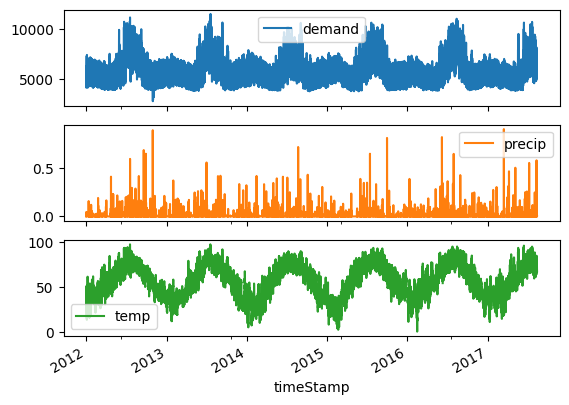

In [10]:
data.plot(subplots=True)

In [11]:
df['demand']=df['demand'].fillna(method='ffill')
df['temp']=df['temp'].fillna(method='ffill')
df['precip']=df['precip'].fillna(method='ffill')

In [12]:
df

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.500,0.0000,46.13
1,2012-01-01 01:00:00,4752.100,0.0000,45.89
2,2012-01-01 02:00:00,4542.600,0.0000,45.04
3,2012-01-01 03:00:00,4357.700,0.0000,45.03
4,2012-01-01 04:00:00,4275.500,0.0000,42.61
...,...,...,...,...
49200,2017-08-12 02:00:00,5534.683,0.0000,70.84
49201,2017-08-12 03:00:00,5534.683,0.0000,70.57
49202,2017-08-12 04:00:00,5534.683,0.0000,69.89
49203,2017-08-12 05:00:00,5534.683,0.0000,68.59


In [13]:
new_df = el_df.resample('M').mean()

array([<AxesSubplot: xlabel='timeStamp'>,
       <AxesSubplot: xlabel='timeStamp'>,
       <AxesSubplot: xlabel='timeStamp'>], dtype=object)

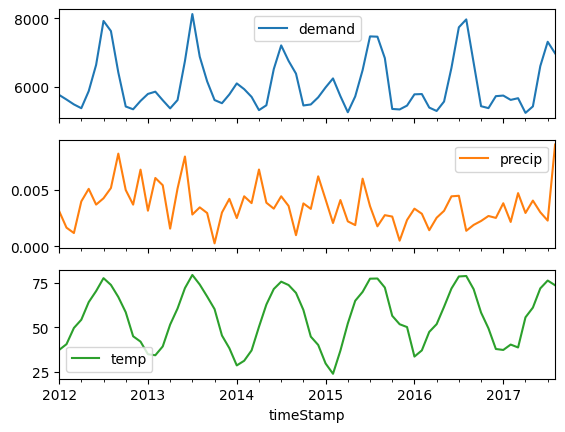

In [14]:
new_df.plot(subplots=True)

In [16]:
import pmdarima as pm
model = pm.auto_arima(new_df['demand'],m=12,seasonal=True,
                     start_p=0,start_q=0,test='adf',
                     stepwise=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1101.053, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1021.429, Time=0.46 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.859, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.502, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1037.809, Time=0.94 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1002.162, Time=0.39 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1000.217, Time=1.05 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=993.083, Ti

In [18]:
train=new_df[(new_df.index.get_level_values(0) >= '2012-01-31') & (new_df.index.get_level_values(0) <= '2017-04-30')]
test=new_df[(new_df.index.get_level_values(0) > '2017-04-30')]
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.315935,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7309.246677,0.002272,76.395270
2017-08-31,6971.501248,0.008961,73.730258


In [19]:
model.fit(train['demand'])

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [21]:
forecast = model.predict(n_periods=4)

In [24]:
forecast_df = pd.DataFrame(forecast,index = test.index, columns = ['Prediction'])
forecast_df

,Prediction
timeStamp,
2017-05-31,5322.118125
2017-06-30,6205.604227
2017-07-31,7187.965236
2017-08-31,7302.377000


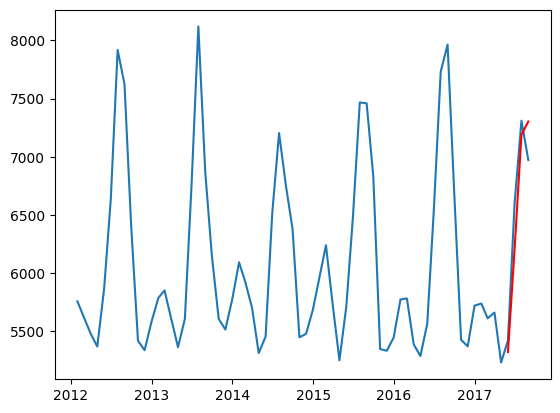

In [26]:
import matplotlib.pyplot as plt
plt.plot(new_df['demand'])
plt.plot(forecast_df,color='r')